# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 1 - Smoothers and Generalized Additive Models



**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner


<hr style="height:2pt">

### Homework 1 is due February 6th

In [45]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [46]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Seaborn visualization library
import seaborn as sns



<hr style="height:2pt">

### Problem 1 - Modeling Seasonality of Airbnb Prices
In this problem, the task is to build a regression model to predict the price of an Airbnb rental for a given date. The data are provided in `calendar_train.csv` and `calendar_test.csv`, which contain availability and price data for a sample of Airbnb units in the Boston area from 2017 to 2018, about 4 observations per day in each set.

Start by loading the data using pandas.  
*Hint*: You likely want to have pandas parse the `date` column as a datetime object via the `parse_dates` argument of `pd.read_csv`

In [47]:
#your code here

caltrain = pd.read_csv('Data/calendar_train.csv', sep = ',',parse_dates = ['date'] )
caltest = pd.read_csv('Data/calendar_test.csv', sep = ',',parse_dates = ['date'] )
    





### Exploratory Analysis

Visualize the average price by month and day of the week (i.e., Monday, Tuesday, etc.) for the training set. Point out any trends you notice and explain whether or not they make sense.

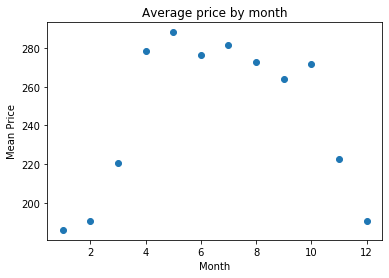

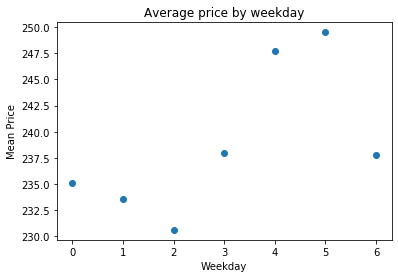

In [131]:
#your code here
#for training data 
import calendar
caltrain['Month'] = caltrain['date'].dt.month
caltrain['Weekday'] = caltrain['date'].dt.weekday


caltest['Month'] = caltest['date'].dt.month
caltest['Weekday'] = caltest['date'].dt.weekday

#dropna

caltrain1 = caltrain.dropna()
caltest1 = caltest.dropna()

Monthmean = caltrain1.groupby('Month')['price'].mean()
Monthmeandf = pd.DataFrame({'Month':Monthmean.index, 'MeanPrice':Monthmean.values})
Weekmean = caltrain1.groupby('Weekday')['price'].mean()
Weekmeandf = pd.DataFrame({'Weekday':Weekmean.index, 'MeanPrice':Weekmean.values})

plt.figure(1)
plt.scatter(Monthmeandf.Month,Monthmeandf.MeanPrice)
plt.title("Average price by month")
plt.xlabel("Month")
plt.ylabel("Mean Price")
plt.show()
plt.figure(2)
plt.scatter(Weekmeandf.Weekday,Weekmeandf.MeanPrice)
plt.title("Average price by weekday")
plt.xlabel("Weekday")
plt.ylabel("Mean Price")
plt.show()




The first graph for month shows the the average price of a unit increases during the summer months and are lower in winter.
This makes sense because more people travel during summer than in winter
The second graph shows that the prices rises at the end of the week and is lowest middle of the week. This also makes people tend to travel for lesiure more weekends and around it and less middle of the week.

### Explore different regression models

Fit a regression model that uses the date as a predictor and predicts the price of an Airbnb rental on that date. In this section, you should ignore all other predictors besides the date. Fit the following models on the training set, and compare the $R^2$ of the fitted models on the test set. Include plots of the fitted models for each method.

*Hint*: You may want to convert the `date` column into a numerical variable by taking the difference in days between each date and the earliest date in the column.

1. Fit simple polynomial models of degree 2, 3, 5, and 8 to the training data. Provide train and test R^2 scores and provide plot(s) of a) the daily averages and b) each model's predictions.

2. You should see that the degree 8 polynomial's predictions are awful- either nonsensically near zero [or far too large] at many input values. This isn't just simple overfitting. What is going wrong in this model, and how might it be addressed?

3. Fit a Smoothing spline model in `pygam` with the smoothness parameter chosen by cross-validation on the training set. Provide the train and test scores of the best-performing model, and plot its predictions. Also plot the predictions of models with more and less smoothing. When plotting the smooths, show a scatterplot of the daily averages on the same axes, for context.

4. Of the models, which performs the best? What is the effect of the tuning parameters (degree and smoothness penalty)?

In [132]:
#Add column to store the day from minimum
caltrain1.loc[:,("Day")] = (caltrain1['date'] - caltrain1['date'].min()).dt.days
caltest1.loc[:,("Day")] = (caltest1['date'] - caltest1['date'].min()).dt.days

DailyMeanTrain = caltrain1.groupby('Day')['price'].mean()
DailyMeanTraindf = pd.DataFrame({'Day':DailyMeanTrain.index, 'price':DailyMeanTrain.values})
DailyMeanTest = caltest1.groupby('Day')['price'].mean()
DailyMeanTestdf = pd.DataFrame({'Day':DailyMeanTest.index, 'price':DailyMeanTest.values})

/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


### 1. Polynomials

R2 for training data and 2 order polynomial is 0.19584841843111234


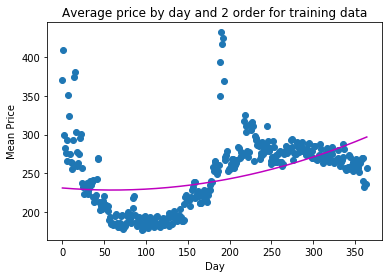

R2 for test data and 2 order polynomial is 0.2003166985362954


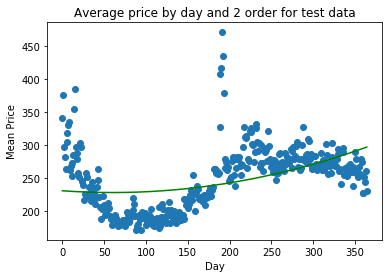

R2 for training data and 3 order polynomial is 0.6380031312876843


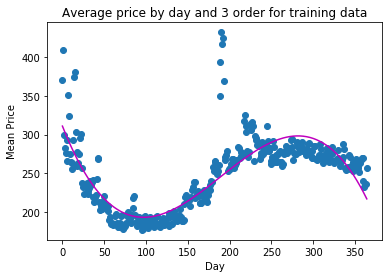

R2 for test data and 3 order polynomial is 0.6139438241366353


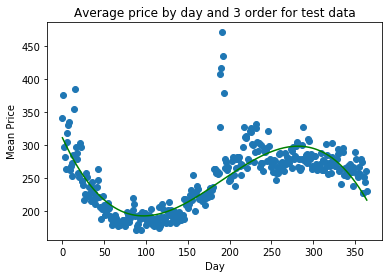

R2 for training data and 5 order polynomial is 0.7168982314758164


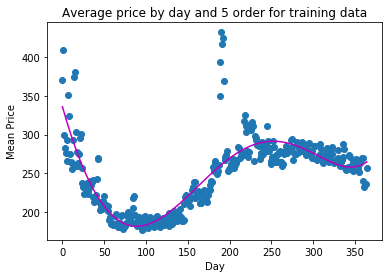

R2 for test data and 5 order polynomial is 0.6850528882986398


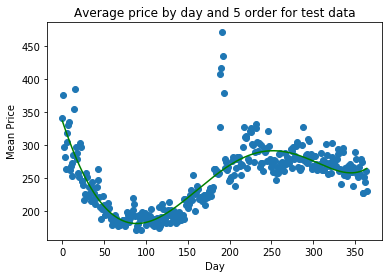

R2 for training data and 8 order polynomial is -4.86308919964618


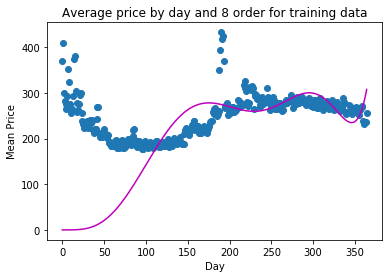

R2 for test data and 8 order polynomial is -4.515974676523269


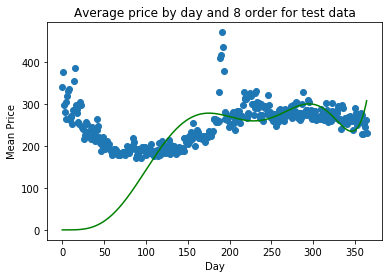

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     181.8
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           4.68e-96
Time:                        03:27:03   Log-Likelihood:                -1687.7
No. Observations:                 365   AIC:                             3387.
Df Residuals:                     359   BIC:                             3411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.1147      3.811     44.110      0.000     160.619     175.610
X_poly[0]    168.1167      3.811     44.110      0.000     160.621     175.612
X_poly[1]     -3.8290      0.425     -9.005      0.000      -4.665      -2.993
X_poly[2]      0.0258      0.007      3.554      0.000       0.012       0.040
X_poly[3]  -6.002e-06   5.07e-05     -0.118      0.906      -0.000    9.37e-05
X_poly[4]  -2.705e-07   1.54e-07     -1.761      0.079   -5.72e-07    3.15e-08
X_poly[5]   4.599e-10   1.68e-10      2.740      0.006     1.3e-10     7.9e-10
==============================================================================
Omnibus:                      307.499   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6046.401
Skew:                           3.502   Prob(JB):                         0.00
Kurtosis:                      21.668   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
x = DailyMeanTraindf.Day
x = x[:, np.newaxis]
y = DailyMeanTraindf.price
y = y[:, np.newaxis]

def model_poly(ndeg):
  #Fit nth degree polynomial
  poly = PolynomialFeatures(degree = ndeg) 

  X_poly = poly.fit_transform(x) 
  poly_reg = sm.ols(formula = 'y ~ X_poly', data = DailyMeanTraindf).fit()
  y_poly_pred = poly_reg.predict( DailyMeanTraindf)
  r2 = r2_score(y,y_poly_pred)
  print("R2 for training data and " + str(ndeg)+ " order polynomial is "  + str(r2))
  #plt.figure(1)
  plt.scatter( DailyMeanTraindf.Day, DailyMeanTraindf.price)
  plt.title("Average price by day and " + str(ndeg) + " order for training data")
  plt.xlabel("Day")
  plt.ylabel("Mean Price")
  plt.plot(DailyMeanTraindf.Day, y_poly_pred, color='m')
  plt.show()

  #check test data 
  y2 = DailyMeanTestdf.price
  y2_poly_pred = poly_reg.predict(DailyMeanTestdf)
  r2test = r2_score(y2,y2_poly_pred)
  print("R2 for test data and " + str(ndeg)+ " order polynomial is "  + str(r2test))
  #plt.figure(1)
  plt.scatter( DailyMeanTestdf.Day, DailyMeanTestdf.price)
  plt.title("Average price by day and " + str(ndeg) + " order for test data")
  plt.xlabel("Day")
  plt.ylabel("Mean Price")
  plt.plot(DailyMeanTestdf.Day, y2_poly_pred, color='g')
  plt.show()
  return poly_reg
    
poly_reg2 = model_poly(2)
poly_reg3 = model_poly(3)
poly_reg5 = model_poly(5)
poly_reg8 = model_poly(8)

poly_reg5.summary()



_your answer here_


 2. Degree 8 oddity
The reason for the odd behavior could be that with higher order polynpmials, there is some multicollinearity which can cause this behavior.  

### 3. Smoothing spline model with the smoothness parameter chosen by cross-validation on the training set.

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


[3.e-03 3.e-01 3.e+01 3.e+03 3.e+05]
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      4.8546
Link Function:                     IdentityLink Log Likelihood:                                  -2681.871
Number of Samples:                          365 AIC:                                             5375.4512
                                                AICc:                                            5375.6753
                                                GCV:                                              634.0058
                                                Scale:                                            618.8456
                                                Pseudo R-Squared:                                   0.7155


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



R2 for training data with 50 splines is 0.8672451451147984 and test data is 0.8313921501674545
[3.e-03 3.e-01 3.e+01 3.e+03 3.e+05]
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.0304
Link Function:                     IdentityLink Log Likelihood:                                 -2148.4936
Number of Samples:                          365 AIC:                                             4489.0481
                                                AICc:                                            4558.5923
                                                GCV:                                              262.3982
                                                Scale:                                            143.2747
            

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.7554
Link Function:                     IdentityLink Log Likelihood:                                 -2127.3331
Number of Samples:                          365 AIC:                                             4448.1769
                                                AICc:                                            4518.9612
                                                GCV:                                              249.0923
                                                Scale:                                            135.1848
                                                Pseudo R-Squared:                                   0.9535
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:02 Time:  0:00:02
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5337
Link Function:                     IdentityLink Log Likelihood:                                  -757.7599
Number of Samples:                          365 AIC:                                              2222.587
                                                AICc:                                           26173.5821
                                                GCV:                                                0.8711
                                                Scale:                                              3.1636
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

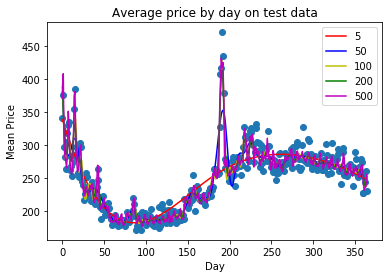

In [134]:
#Create model with different number of splines
x = DailyMeanTraindf.Day
y = DailyMeanTraindf.price
x2 = DailyMeanTestdf.Day
y2 = DailyMeanTestdf.price
plt.scatter( x2, y2)  
plt.title("Average price by day on test data")
plt.xlabel("Day")
plt.ylabel("Mean Price")
def model_gam(nspline, color):
  #Fit n splines
  lam = np.logspace(-3,5,5)
  lams=lam*3
  print(lams)
  gam = LinearGAM(s(0, n_splines=nspline) ).fit(x, y)
  gam.gridsearch(x,y,lam=lams)
  gam.summary()
  y_gam_pred = gam.predict( x)
  r2 = r2_score(y,y_gam_pred)
  #check test data 
  y2_gam_pred = gam.predict(x2)
  r2test = r2_score(y2,y2_gam_pred)
  print("R2 for training data with " + str(nspline)+ " splines is "  + str(r2) + " and test data is " +str(r2test))
  plt.plot(x2, gam.predict(x2), color, label = str(nspline))
  return gam

  

gam5 = model_gam(5,"r")
gam50 = model_gam(50,"b")
gam100 = model_gam(100,"y")
gam200 = model_gam(200,"g")
gam200 = model_gam(500,"m")
plt.legend()
plt.show()




  





4. Effects of parameters
For the different number of splines we can see that the r2 and gcv for both training an testing is best with 500 spline and a lamda of .003. This can also be seen in the cross validation graph.



### Part 1b: Adapting to weekends

It is possible/likely that prices on weekends (Friday nights and Saturday nights) are systematically higher than prices on weekdays, and that including this aspect of the data-generating process in our model will produce a better fit.

5. Create a binary indicator of weekend versus non-weekend, and include it in your best-performing model from above. How does it impact the model's performance?  
*Hint*: include a categorical variable in a GAM by importing and using `pygam.f` in the same way you've used `pygam.s` for continuous variables.


In [150]:
#your code here


# Add Weekend column

# Add a new column named 'Price' 
caltrain1['Weekend'] = [1 if (x == 4 or x ==5) else 0 for x in caltrain1['Weekday']] 
caltrain3 = caltrain1.loc[:, ['Day', 'Weekend']]
caltrain2 = pd.DataFrame(caltrain3.drop_duplicates(subset=['Day','Weekend']).sort_values(by=['Day']))
x = caltrain2.Weekend
print(type(x))
DailyMeanWePrice = DailyMeanTraindf
DailyMeanWePrice['Weekend'] = x.tolist()
X = DailyMeanWePrice.loc[:, ['Day', 'Weekend']]
y = DailyMeanWePrice.price
gam = LinearGAM(s(0, n_splines=500) + f(1)).fit(X, y)
gam.summary()
lam = np.logspace(-3,5,5)
lams=lam*3
gam.gridsearch(X,y,lam=lams)
gam.summary()

#Prepare test data
# Add a new column named 'Price' 
caltest1['Weekend'] = [1 if (x == 4 or x ==5) else 0 for x in caltest1['Weekday']] 
caltest3 = caltest1.loc[:, ['Day', 'Weekend']]
caltest2 = pd.DataFrame(caltest3.drop_duplicates(subset=['Day','Weekend']).sort_values(by=['Day']))
x = caltest2.Weekend
print(type(x))
DailyMeanWePriceTest = DailyMeanTestdf
DailyMeanWePriceTest['Weekend'] = x.tolist()
X2 = DailyMeanWePriceTest.loc[:, ['Day', 'Weekend']]
y2 = DailyMeanWePriceTest.price

  
y_gam_pred = gam.predict( X)
r2 = r2_score(y,y_gam_pred)
y2_gam_pred = gam.predict(X2)
r2test = r2_score(y2,y2_gam_pred)
print("R2 for training data including weekend information " + str(500)+ " splines is "  + str(r2)  + " and test data is " + str(r2test))
  


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.series.Series'>


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

N/A% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      47.212
Link Function:                     IdentityLink Log Likelihood:                                 -3169.6613
Number of Samples:                          365 AIC:                                             6435.7465
                                                AICc:                                             6450.773
                                                GCV:                                             3059.2414
                                                Scale:                                           2356.3761
                                                Pseudo R-Squared:                                   0.0442
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5521
Link Function:                     IdentityLink Log Likelihood:                                  -777.4001
Number of Samples:                          365 AIC:                                             2261.9043
                                                AICc:                                           26257.5788
                                                GCV:                                                0.9178
                                                Scale:                                              3.3395
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Part 1c: Going the Distance

You may have noticed from your scatterplots of average price versus day on the training set that there are a few days with abnormally high average prices.

Sort the training data in decreasing order of average price, extracting the 10 most expensive dates. Why are the prices on these days so high? Is it something about the days themselves, noise, an artifact of data collection, or something else?

In [151]:
#your code here
Datemean = caltrain1.groupby('date')['price'].mean()
Datemeandf = pd.DataFrame({'Day':Datemean.index, 'price':Datemean.values})
Datemeandf.sort_values(by=['price'], ascending=False)[:10]
#print("a")

,Day,price
190,2018-04-14,432.680761
192,2018-04-16,425.289528
191,2018-04-15,417.170404
1,2017-10-07,409.298701
189,2018-04-13,393.609047
15,2017-10-21,381.526515
14,2017-10-20,374.955932
0,2017-10-06,370.173410
193,2018-04-17,369.371060
7,2017-10-13,351.800725


Some of the most expensive dayse are between April 13 and April 17 of 2018. These are the dates around the Boston Marathon day ( Monday April 16 2018). The Saturday Sunday and the the Day of the Marathon are most expensive.

The rest are weekends in October. October 6th and 7th are the Saturday and Sunday preceding Columbus day so maybe more people visit.

The other of these weekends could be because more people come on those weekends to enjoy Fall colors around Boston.

### Problem 2: Predicting Airbnb Rental Price Through Listing Features

In this problem, we'll continue our exploration of Airbnb data by predicting price based on listing features. The data can be found in `listings_train.csv` and `listings_test.csv`.

First, visualize the relationship between each of the predictors and the response variable. Does it appear that some of the predictors have a nonlinear relationship with the response variable?

   host_total_listings_count        room_type   latitude  longitude  \
0                          1     Private room  42.347956 -71.155196   
1                         85  Entire home/apt  42.349299 -71.083470   
2                          6  Entire home/apt  42.341902 -71.073792   
3                          1  Entire home/apt  42.319235 -71.105016   
4                          1  Entire home/apt  42.346452 -71.134896   

   bathrooms  bedrooms  beds  price  security_deposit  cleaning_fee  \
0        1.0         1     1     52                 1            65   
1        1.0         0     1    110                 1           104   
2        1.0         1     1     67                45            56   
3        2.0         2     2    103                 8           113   
4        1.0         0     1      8                24            82   

   availability_365  number_of_reviews  
0               365                 26  
1               107                 38  
2               322    

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

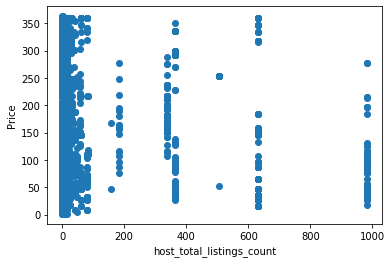

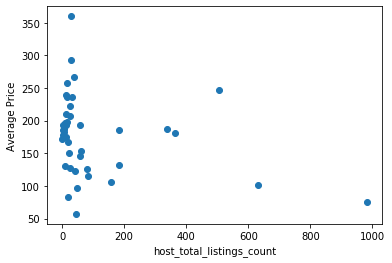

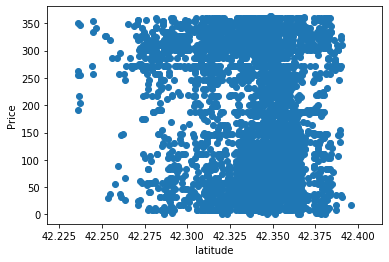

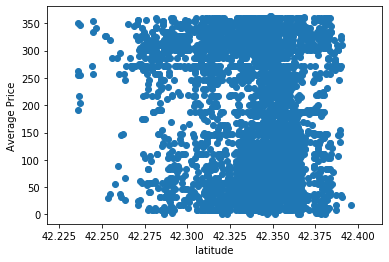

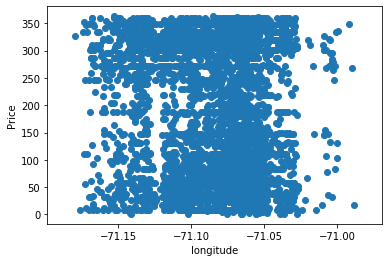

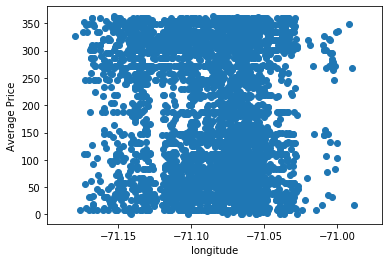

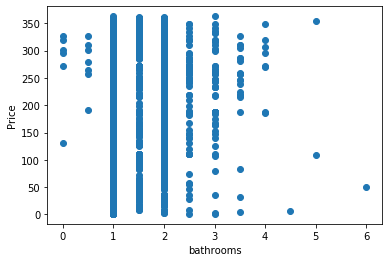

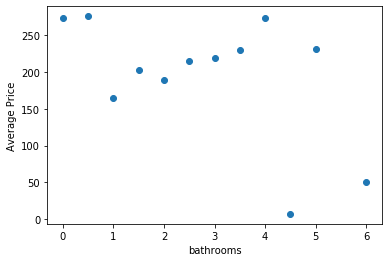

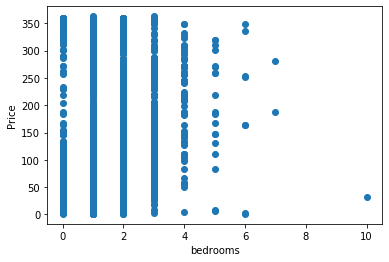

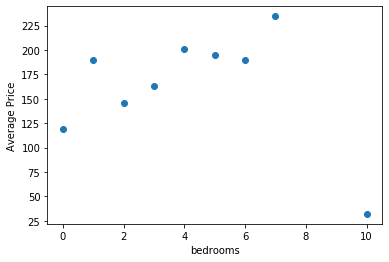

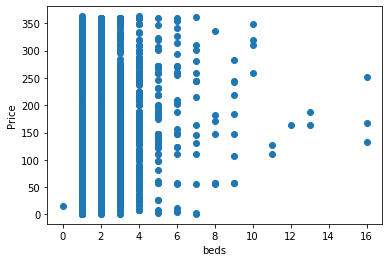

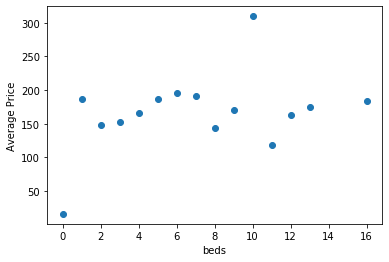

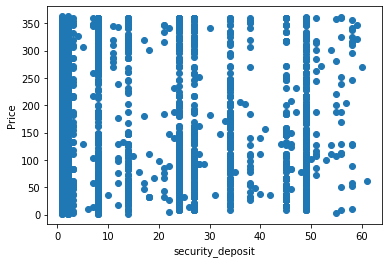

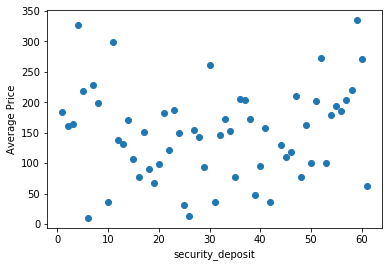

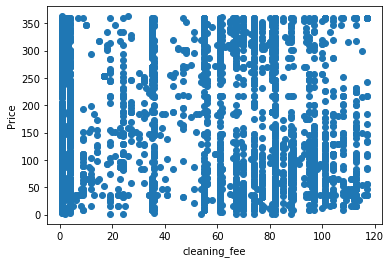

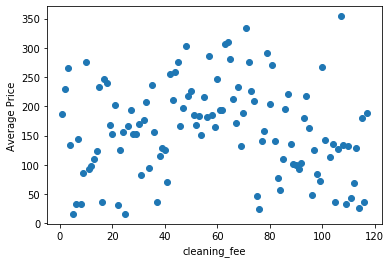

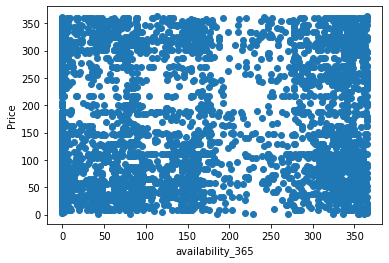

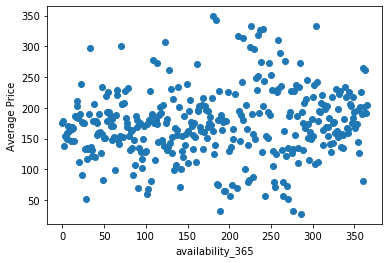

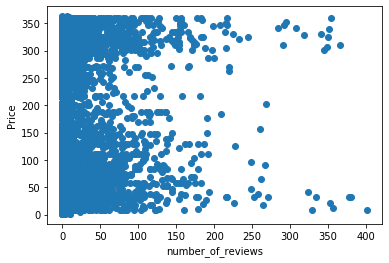

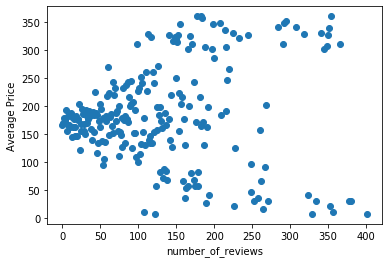

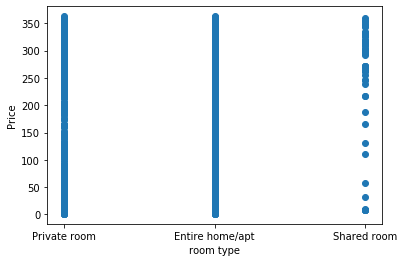

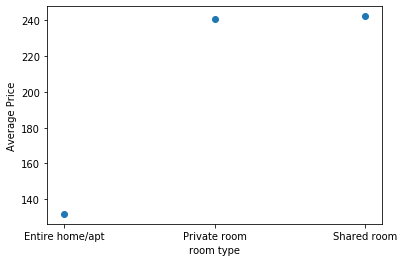

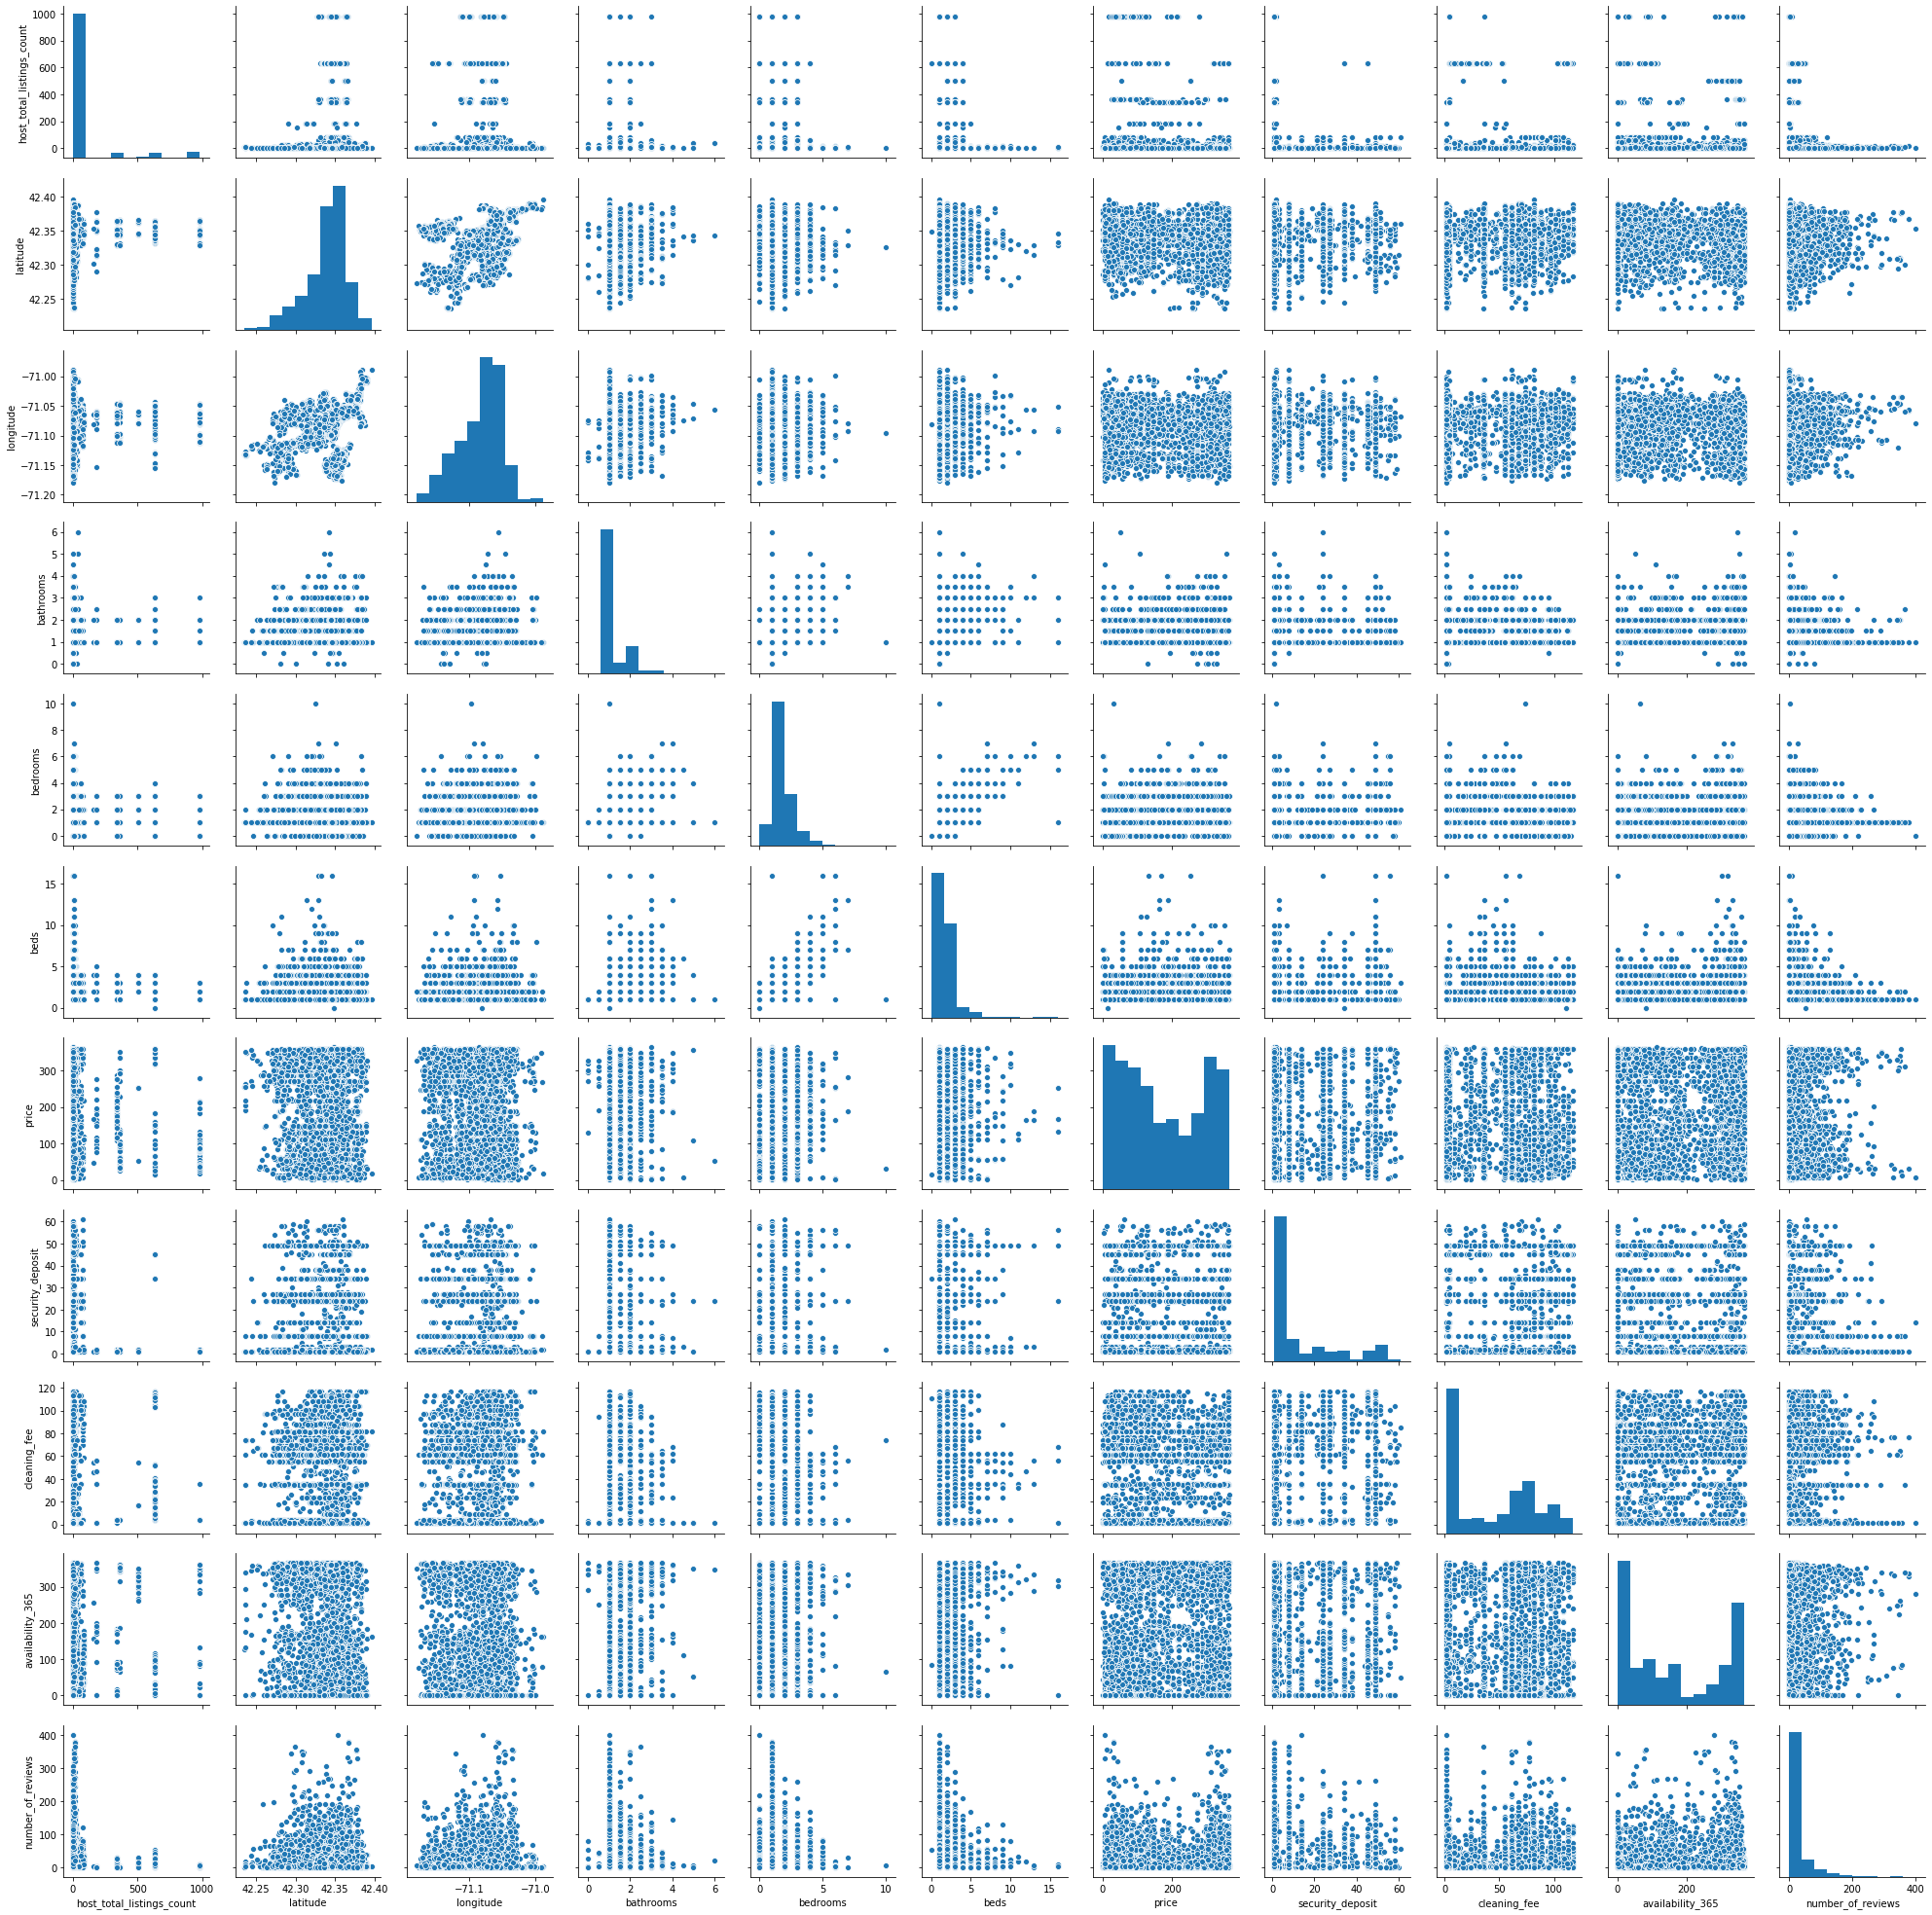

In [259]:
#your code here
#get the data
listtrain = pd.read_csv('Data/listings_train.csv', sep = ',' )
listtest = pd.read_csv('Data/listings_test.csv', sep = ',' )

print(listtrain.head(5))

#Create scatterplots
def printscatter(x, xlabel, fignum):
 plt.figure(fignum)
 plt.scatter(x,listtrain.price)
 plt.xlabel(xlabel)
 plt.ylabel("Price")
    
def printmeanscatter(x, xlabel, fignum):
 data = {'X':x, "Y":listtrain.price} 
 dftrain = pd.DataFrame ( data)
 Datamean = dftrain.groupby('X')['Y'].mean()
 Datameandf = pd.DataFrame({'X':Datamean.index, 'Y':Datamean.values})
 plt.figure(fignum+20)
 plt.scatter(Datameandf['X'],Datameandf['Y'])
 plt.xlabel(xlabel)
 plt.ylabel("Average Price")

printscatter(listtrain.host_total_listings_count,'host_total_listings_count',1)
printmeanscatter(listtrain.host_total_listings_count,'host_total_listings_count',1)
printscatter(listtrain.latitude,"latitude",2)
printmeanscatter(listtrain.latitude,"latitude",2)
printscatter(listtrain.longitude,"longitude",3)
printmeanscatter(listtrain.longitude,"longitude",3)
printscatter(listtrain.bathrooms,"bathrooms",4)
printmeanscatter(listtrain.bathrooms,"bathrooms",4)
printscatter(listtrain.bedrooms,"bedrooms",5)
printmeanscatter(listtrain.bedrooms,"bedrooms",5)
printscatter(listtrain.beds,"beds",6)
printmeanscatter(listtrain.beds,"beds",6)
printscatter(listtrain.security_deposit,"security_deposit",7)
printmeanscatter(listtrain.security_deposit,"security_deposit",7)
printscatter(listtrain.cleaning_fee,"cleaning_fee",8)
printmeanscatter(listtrain.cleaning_fee,"cleaning_fee",8)
printscatter(listtrain.availability_365,"availability_365",9)
printmeanscatter(listtrain.availability_365,"availability_365",9)
printscatter(listtrain.number_of_reviews,"number_of_reviews",10)
printmeanscatter(listtrain.number_of_reviews,"number_of_reviews",10)
printscatter(listtrain.room_type,"room type",11)
printmeanscatter(listtrain.room_type,"room type",11)
    
sns.pairplot(listtrain)

I plotted the response with each variable but because of the wide range of response for each value, it was hard to get a good feel for the tren so I added an additional plot for each varible with average price. It appears that most variable have a non linear relationship. Room Type is a categorical variable.

### Part 2a: Polynomial Regression

Fit the following models on the training set and compare the $R^2$ score of the fitted models on the test set:
    
* Linear regression
* Regression with polynomial basis functions of degree 3 (i.e., basis functions $x$, $x^2$, $x^3$ for each predictor $x$) for quantitative predictors.

In [292]:
#fit linear model
 
ytrain = listtrain.price
Xtrain =listtrain.loc[:, ['host_total_listings_count','latitude','longitude','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','availability_365','number_of_reviews']]
ytest = listtest.price
Xtest =listtest.loc[:, ['host_total_listings_count','latitude','longitude','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','availability_365','number_of_reviews']]
reg = LinearRegression().fit(Xtrain, ytrain)
print(reg)
# make predictions
expected = ytrain
predicted =reg.predict(Xtrain)
r2 = r2_score(expected,predicted)
y2 = reg.predict(Xtest)
r2test = r2_score(ytest,y2)
print("R2 for training data using Linear Regression is  " + str(r2)  + " and test data is " + str(r2test))

#fit polynomial model


y = listtrain.price
y = y[:, np.newaxis]

poly = PolynomialFeatures(degree = 3) 

def get_polytran(x):
  x1 = x[:, np.newaxis]
  xret = poly.fit_transform(x1)
  return(xret)
xhost_total_listings_count = get_polytran(listtrain.host_total_listings_count)
xlatitude = get_polytran(listtrain.latitude)
xlongitude = get_polytran(listtrain.longitude)
xbathrooms = get_polytran(listtrain.bathrooms)
xbedrooms = get_polytran(listtrain.bedrooms)
xbeds = get_polytran(listtrain.beds)
xsecurity_deposit = get_polytran(listtrain.security_deposit)
xcleaning_fee = get_polytran(listtrain.cleaning_fee)
xavailability_365 = get_polytran(listtrain.availability_365 )
xnumber_of_reviews = get_polytran(listtrain.number_of_reviews) 
Xtest_poly = poly.fit_transform(Xtest)
mod = sm.ols(formula = 'ytrain ~ xhost_total_listings_count + xlatitude + xlongitude+bathrooms  + xbedrooms + xbeds + xsecurity_deposit + xcleaning_fee + xavailability_365+ xnumber_of_reviews  ', data = listtrain)
poly_reg = mod.fit()
print(poly_reg.summary())
y_poly_pred = poly_reg.predict(listtrain)
r2 = r2_score(ytrain,y_poly_pred)
print("R2 for training data and polynomial regression is " + str(r2))
y2test = poly_reg.predict(listtest)
#print(y2test)
#print(y2test.summary_frame(alpha=0.05))
#r2test = r2_score(ytest,y2test)
print("R2 for training data and polynomial regression is " + str(r2))
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 for training data using Linear Regression is  0.11182732477334534 and test data is 0.039968810565142565
                            OLS Regression Results                            
Dep. Variable:                 ytrain   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     30.19
Date:                Thu, 06 Feb 2020   Prob (F-statistic):          8.11e-136
Time:                        08:22:43   Log-Likelihood:                -26571.
No. Observations:                4370   AIC:                         5.320e+04
Df Residuals:                    4343   BIC:                         5.337e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and xhost_total_listings_count (487 versus 4370)
    ytrain ~ xhost_total_listings_count + xlatitude + xlongitude+bathrooms  + xbedrooms + xbeds + xsecurity_deposit + xcleaning_fee + xavailability_365+ xnumber_of_reviews
             ^^^^^^^^^^^^^^^^^^^^^^^^^^

### Part 2b: Generalized Additive Model (GAM)

1. Do you see any advantage in fitting an additive regression model to these data, compared to the above models?

1. Fit a GAM to the training set, and compare the test $R^2$ of the fitted model to the above models. You may use a smoothing spline basis function on each predictor, with the same smoothing parameter for each basis function, tuned using cross-validation on the training set.

2. Plot and examine the smooth of each predictor for the fitted GAM. What are some useful insights conveyed by these plots?


_your answer here_


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  from ipykernel import kernelapp as app
N/A% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     229.765
Link Function:                     IdentityLink Log Likelihood:                                -43979.6537
Number of Samples:                         4370 AIC:                                            88420.8375
                                                AICc:                                           88446.6858
                                                GCV:                                            10341.4156
                                                Scale:                                           9367.5314
                                                Pseudo R-Squared:                                   0.3284
Feature Function                  Lam

100% (5 of 5) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    100.5577
Link Function:                     IdentityLink Log Likelihood:                                -44098.4064
Number of Samples:                         4370 AIC:                                            88399.9282
                                                AICc:                                           88404.8096
                                                GCV:                                            10040.5855
                                                Scale:                                           9625.5786
                                                Pseudo R-Squared:                                   0.2883
Feature Function                  Lam

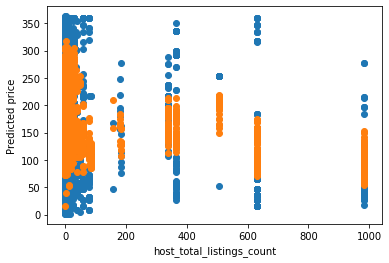

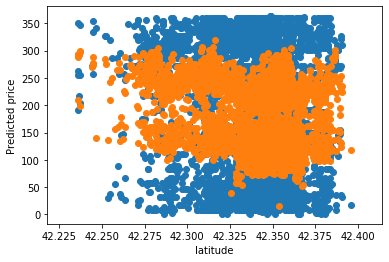

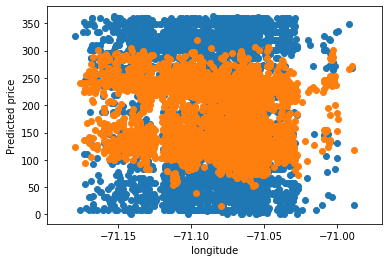

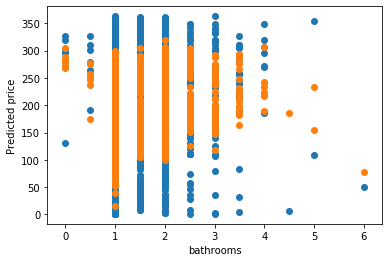

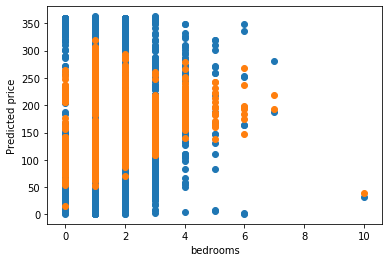

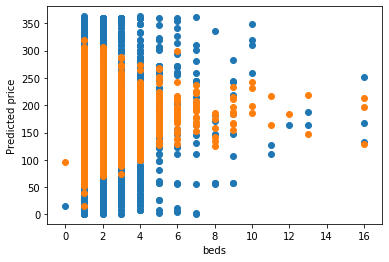

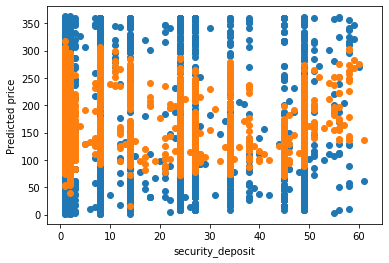

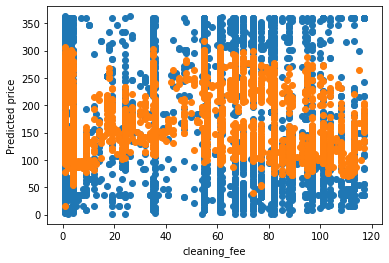

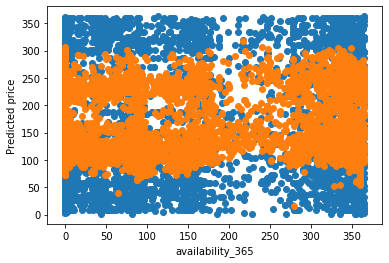

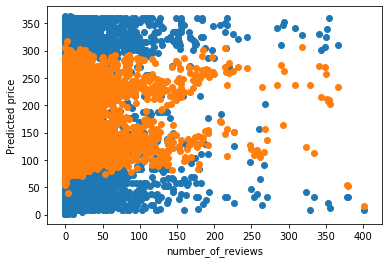

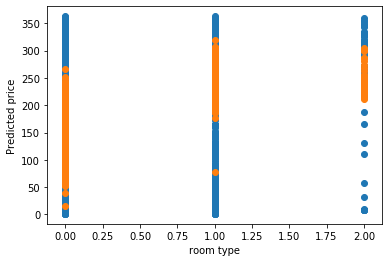

In [262]:
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder
#use label encoder to transform room type
labelencoder = LabelEncoder()
listtrainx = listtrain
listtrainx["room_type"] = labelencoder.fit_transform(listtrainx["room_type"])
ytrain = listtrain.price

listtest["room_type"] = labelencoder.fit_transform(listtest["room_type"])
ytest = listtest.price
Xtest =listtest.loc[:, ['host_total_listings_count','room_type','latitude','longitude','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','availability_365','number_of_reviews']]

Xtrain =listtrainx.loc[:, ['host_total_listings_count','room_type','latitude','longitude','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','availability_365','number_of_reviews']]
gam = LinearGAM(f(0) + s(1, n_splines=50) + s(2, n_splines=50) + s(3, n_splines=50) + s(4, n_splines=50) + s(5, n_splines=50) + s(6, n_splines=50) + s(7, n_splines=50) + s(8, n_splines=50) + s(9, n_splines=50) + s(10, n_splines=50)).fit(Xtrain, ytrain)
gam.summary()


lam = np.logspace(1,5,5)
lams=lam*1
gam.gridsearch(Xtrain,ytrain,lam=lams)
gam.summary()

y_gam_pred = gam.predict( Xtrain)
r2 = r2_score(ytrain,y_gam_pred)
#y2_gam_pred = gam.predict(Xtest)
#r2test = r2_score(ytest,y2_gam_pred)
print("R2 for training data including weekend information " + str(50)+ " splines is "  + str(r2)  + " and test data is " + str(r2))
  


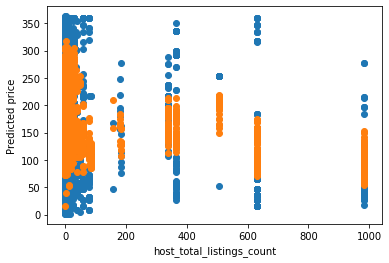

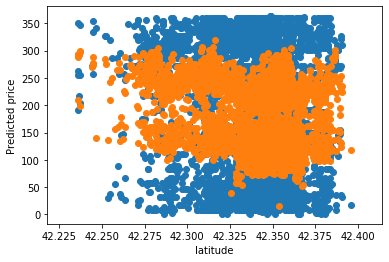

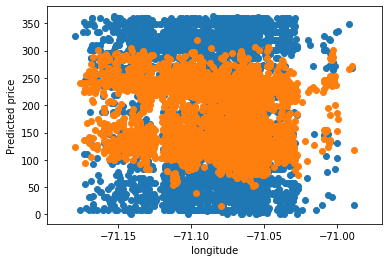

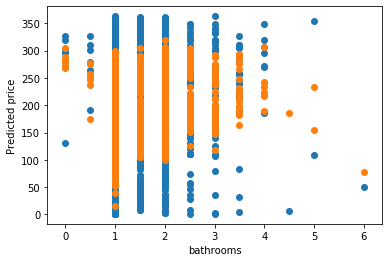

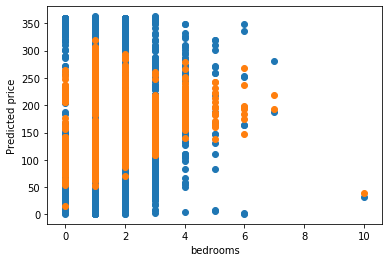

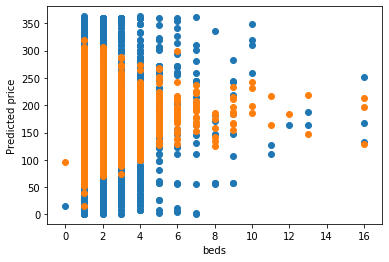

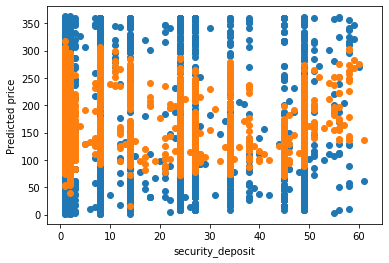

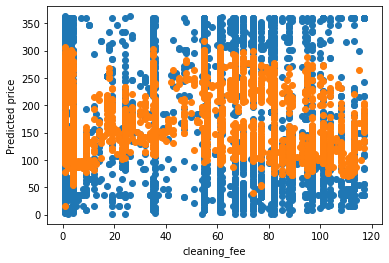

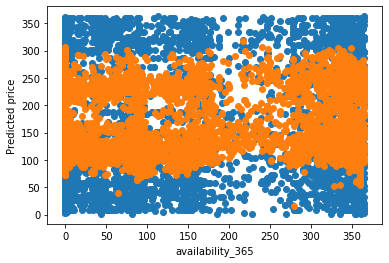

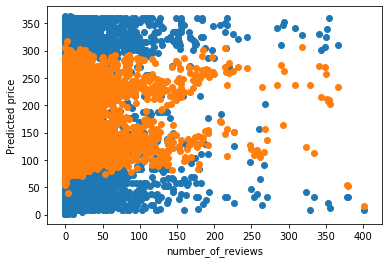

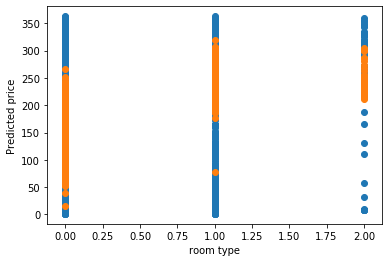

In [263]:
#Create scatterplots
def printscatter(x, xlabel, fignum):
 plt.figure(fignum)
 plt.scatter(x,listtrain.price)
 plt.scatter(x,y_gam_pred)
 plt.xlabel(xlabel)
 plt.ylabel("Predicted price")

printscatter(listtrain.host_total_listings_count,'host_total_listings_count',1)
printscatter(listtrain.latitude,"latitude",2)
printscatter(listtrain.longitude,"longitude",3)
printscatter(listtrain.bathrooms,"bathrooms",4)
printscatter(listtrain.bedrooms,"bedrooms",5)
printscatter(listtrain.beds,"beds",6)
printscatter(listtrain.security_deposit,"security_deposit",7)
printscatter(listtrain.cleaning_fee,"cleaning_fee",8)
printscatter(listtrain.availability_365,"availability_365",9)
printscatter(listtrain.number_of_reviews,"number_of_reviews",10)
printscatter(listtrain.room_type,"room type",11)

### Part 2c: Putting it All Together
Using the GAM outputs and insights from part 1), discuss the most important variables in the driving prices, and give advide to a frugal traveller hoping to visit Boston.

_your answer here_